In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.io import fits
from astroquery.gaia import Gaia

from utils import srcext

In [2]:
hdu_list = fits.open('dwfflare/0a7936112f3150350b27277900f88de2_c4d_151218_061807_ooi_g_v1.fits.fz')
hdu_list.info()

Filename: dwfflare/0a7936112f3150350b27277900f88de2_c4d_151218_061807_ooi_g_v1.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     251   ()      
  1  S29           1 CompImageHDU    129   (2046, 4094)   float32   
  2  S31           1 CompImageHDU    129   (2046, 4094)   float32   
  3  S25           1 CompImageHDU    129   (2046, 4094)   float32   
  4  S26           1 CompImageHDU    129   (2046, 4094)   float32   
  5  S27           1 CompImageHDU    129   (2046, 4094)   float32   
  6  S28           1 CompImageHDU    129   (2046, 4094)   float32   
  7  S20           1 CompImageHDU    129   (2046, 4094)   float32   
  8  S21           1 CompImageHDU    129   (2046, 4094)   float32   
  9  S22           1 CompImageHDU    129   (2046, 4094)   float32   
 10  S23           1 CompImageHDU    129   (2046, 4094)   float32   
 11  S24           1 CompImageHDU    129   (2046, 4094)   float32   
 12  S14           1 CompImageHDU    129 

In [ ]:
imnames = np.array(os.listdir('dwfflare'))
imnames

array(['e43a92f1e7ff242e45474ab422077d27_c4d_151220_055011_ooi_g_v1.fits.fz',
       '5f7d7b3a43c128df8435b4a9a8bebf34_c4d_151218_063550_ooi_g_v1.fits.fz',
       '2fc4826f4d18162a319f908fb5368c70_c4d_151219_055430_ooi_g_v1.fits.fz',
       'fbbb587f979f62286628fdd8d08f3bf9_c4d_151218_062922_ooi_g_v1.fits.fz',
       'c2c814f805e2b1e5d26f448c6f9c7813_c4d_151219_055209_ooi_g_v1.fits.fz',
       '6e069b3ba2f921accc6c6bf54fbc8ea1_c4d_151218_061457_ooi_g_v1.fits.fz',
       '57b477997c643faafd6172419ab99ebb_c4d_151220_064829_ooi_g_v1.fits.fz',
       '617f9152b0999bf6181c91450a6b6e5e_c4d_151220_063452_ooi_g_v1.fits.fz',
       '26bfa65493deec77d452b8e434b2be36_c4d_151220_063002_ooi_g_v1.fits.fz',
       'ccd5b5b01509880da3c00e8011c65183_c4d_151218_064215_ooi_g_v1.fits.fz',
       '1cbc9395ac8d44a2754ecb78c2af2e76_c4d_151220_055500_ooi_g_v1.fits.fz',
       '25872bcfd0d9486c738f613a4f8f31e3_c4d_151218_064614_ooi_g_v1.fits.fz',
       '2435659a4749c786de394d194177803c_c4d_151218_062120_ooi_g

In [4]:
datelist = []

for i, imname in enumerate(imnames):
    try:
        image_header = fits.getheader('dwfflare/' + imname, ext=0)
        datelist.append(image_header['DATE-OBS'])

    except:
        print(i, 'EXT not found')
        datelist.append(image_header['DATE-OBS'])

datearr = np.array(datelist)

44 EXT not found


In [5]:
badinds = []

for i, imname in enumerate(imnames):
    try:
        image_data = fits.getheader('dwfflare/' + imname, ext=16)

    except:
        print(i, 'EXT not found')
        badinds.append(i)

badinds = np.array(badinds)


36 EXT not found
40 EXT not found
44 EXT not found
59 EXT not found
140 EXT not found
164 EXT not found
214 EXT not found
243 EXT not found
284 EXT not found
287 EXT not found


In [6]:
mask = np.ones(len(imnames), dtype=int)
mask[badinds] = 0
mask = mask > 0
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [7]:
imnames_timeordered = imnames[mask][np.argsort(datearr[mask])]

83f149944c64806aaa5454648d982d9e_c4d_151218_060521_ooi_g_v1.fits.fz


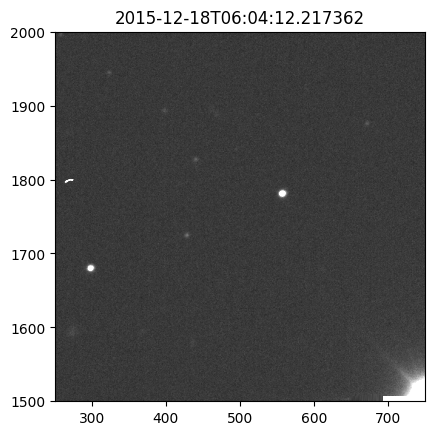

d904d4f514304d4f048be5ce85bf2c47_c4d_151218_060609_ooi_g_v1.fits.fz


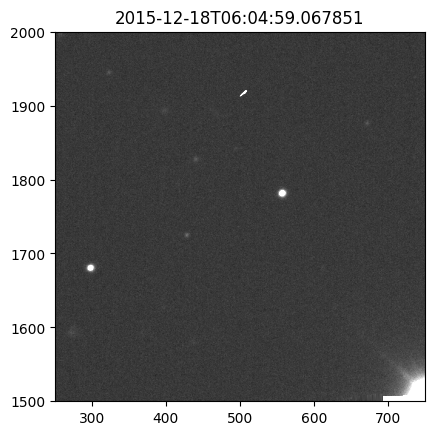

054934c394a7e0349352f660bfe1802b_c4d_151218_060655_ooi_g_v1.fits.fz


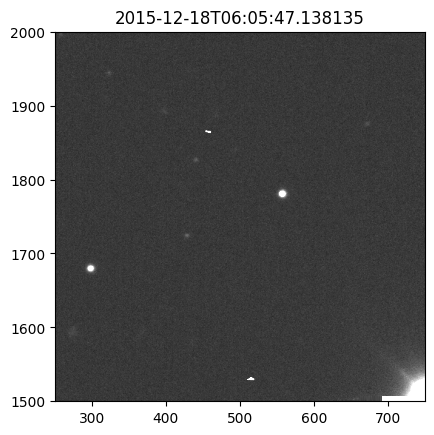

a58663caadc8b97bfaf4df72ed40e359_c4d_151218_060746_ooi_g_v1.fits.fz


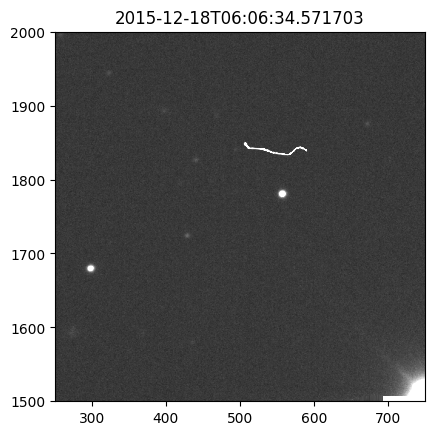

7ef731f77677d0bc75720d46628965ea_c4d_151218_060834_ooi_g_v1.fits.fz


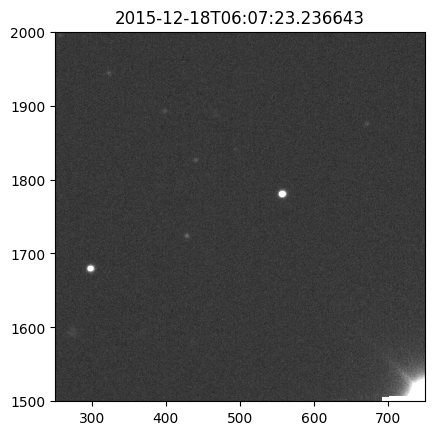

72804a00ade9048948bec579a6c1ba3b_c4d_151218_060925_ooi_g_v1.fits.fz


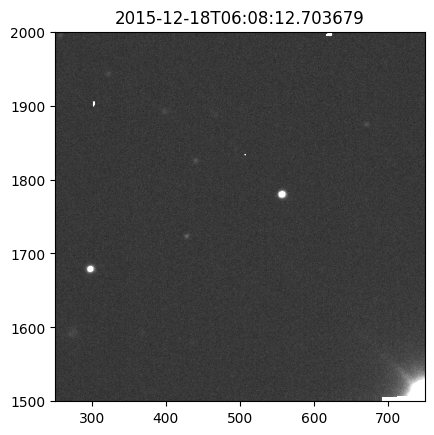

01f29585b8ab98b9445263645de2b759_c4d_151218_061011_ooi_g_v1.fits.fz


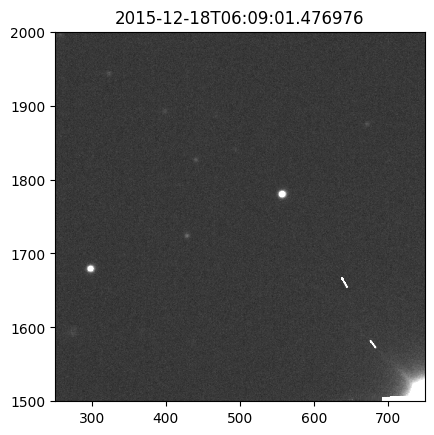

9719d5936f044286414621fffbf331a8_c4d_151218_061057_ooi_g_v1.fits.fz


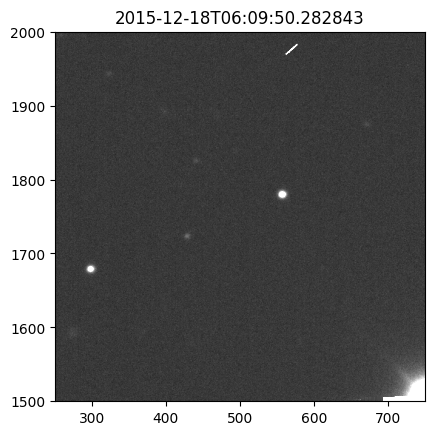

489f990fd94eb9cff4b14219e98b6bde_c4d_151218_061146_ooi_g_v1.fits.fz


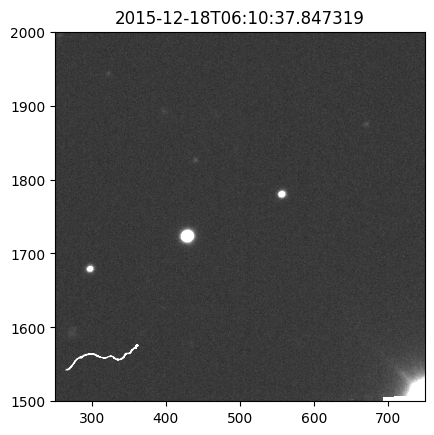

b4fd011a982f3ea4a2d00f14bb454f12_c4d_151218_061233_ooi_g_v1.fits.fz


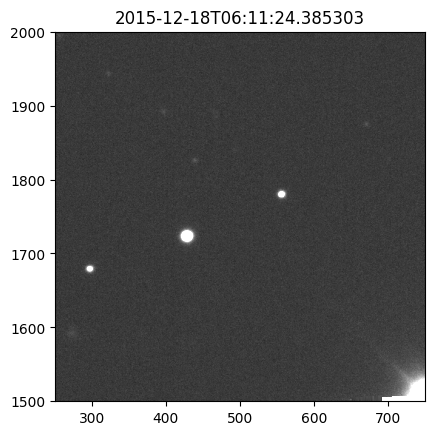

f4facbcacb39955e95a1e203476c0827_c4d_151218_061322_ooi_g_v1.fits.fz


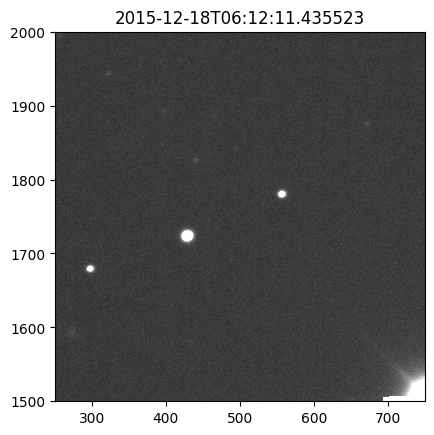

8c580798670c1fdc4ba4b9b98d649a9e_c4d_151218_061408_ooi_g_v1.fits.fz


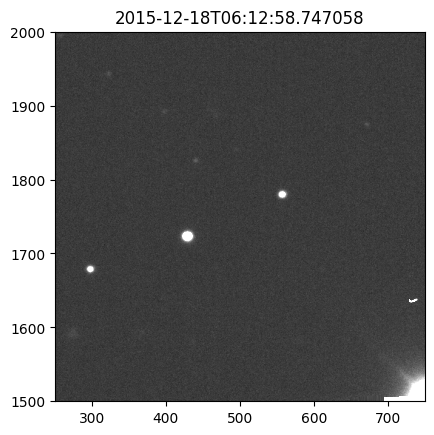

6e069b3ba2f921accc6c6bf54fbc8ea1_c4d_151218_061457_ooi_g_v1.fits.fz


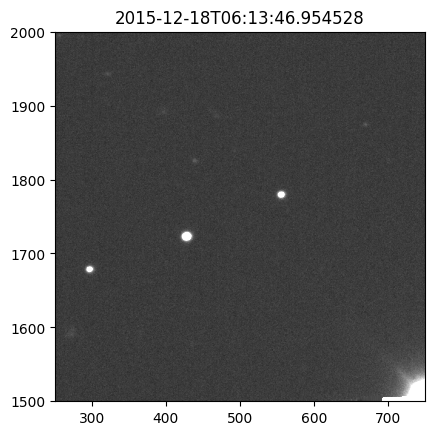

a537628670f94cbad17844c8821ca0df_c4d_151218_061546_ooi_g_v1.fits.fz


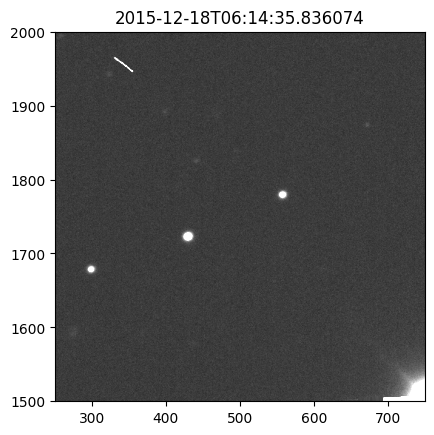

78072e64a2f620c81605bd60cbd54982_c4d_151218_061632_ooi_g_v1.fits.fz


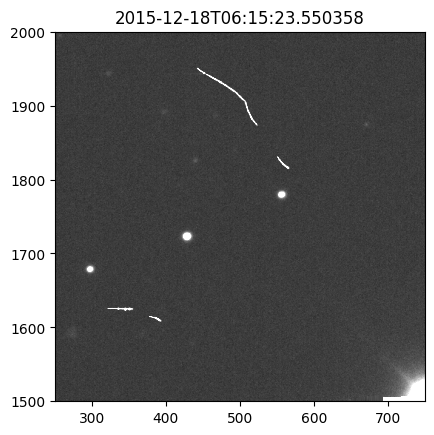

17dc442bf455de4ea83d3ccad3a9e54f_c4d_151218_061719_ooi_g_v1.fits.fz


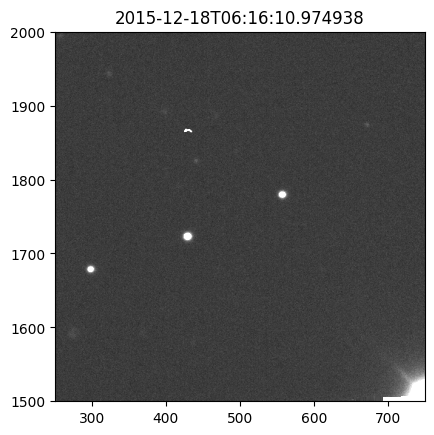

0a7936112f3150350b27277900f88de2_c4d_151218_061807_ooi_g_v1.fits.fz


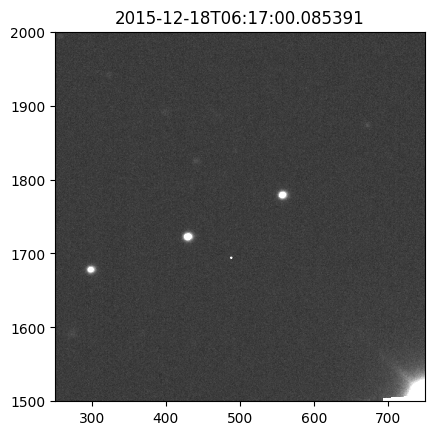

c924e401218b4ed9c25e2a55bf0bbedd_c4d_151218_061858_ooi_g_v1.fits.fz


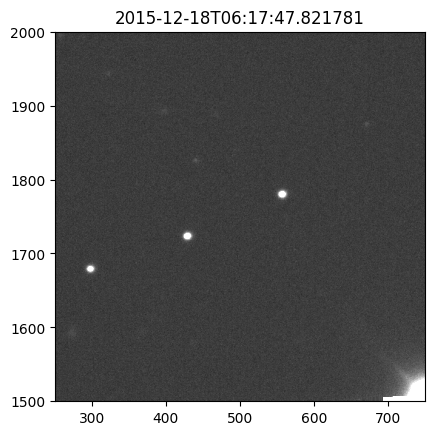

cf9d14efbf7ba9102f7035ac9ceab486_c4d_151218_061944_ooi_g_v1.fits.fz


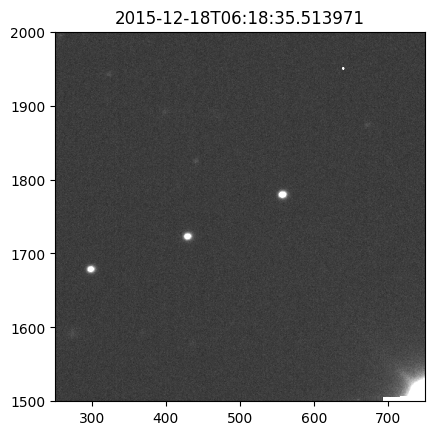

4ecbbf934350cf5801eef02cccc0e498_c4d_151218_062033_ooi_g_v1.fits.fz


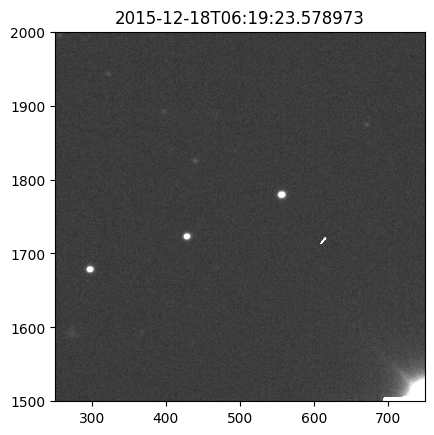

2435659a4749c786de394d194177803c_c4d_151218_062120_ooi_g_v1.fits.fz


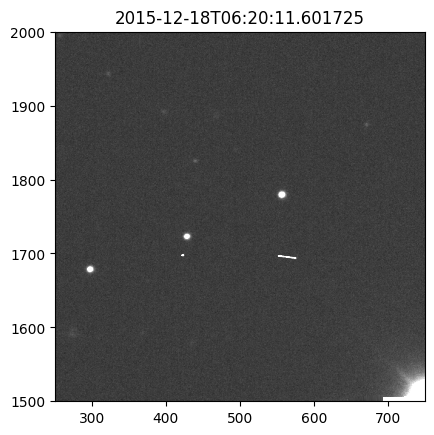

fcf8eb4a0b47e7ddfd27bc449068272c_c4d_151218_062206_ooi_g_v1.fits.fz


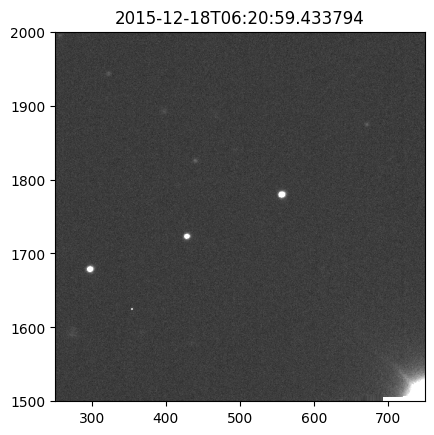

98f24caf62d1ebb176cc6d5578d32962_c4d_151218_062257_ooi_g_v1.fits.fz


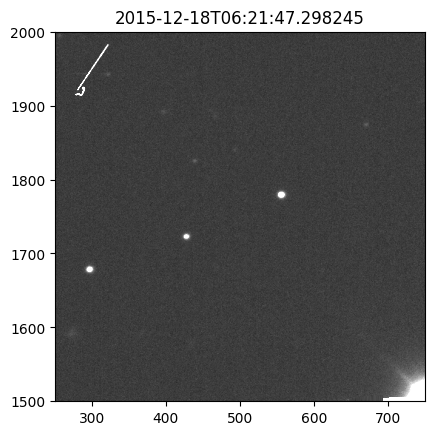

e451087bba169e5a56c9544a7bd3e1d9_c4d_151218_062343_ooi_g_v1.fits.fz


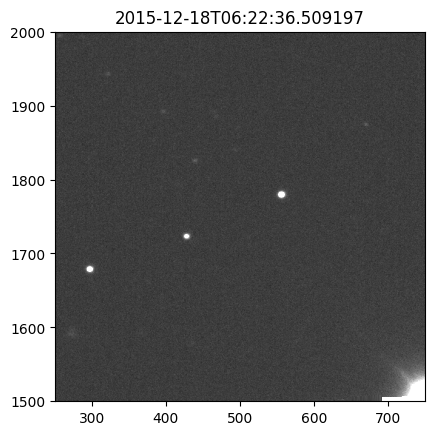

1cdbdc88531d5b2b7de7a8bc1ade7597_c4d_151218_062434_ooi_g_v1.fits.fz


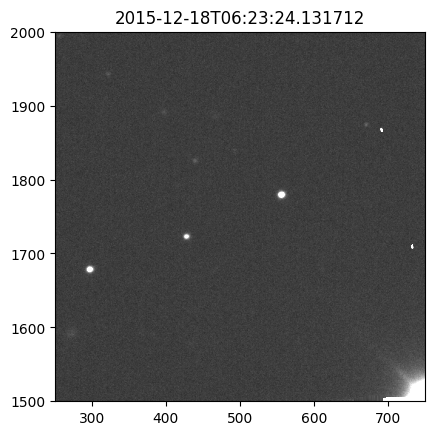

60b48043a80da2f90b74ffbc7153f3d8_c4d_151218_062521_ooi_g_v1.fits.fz


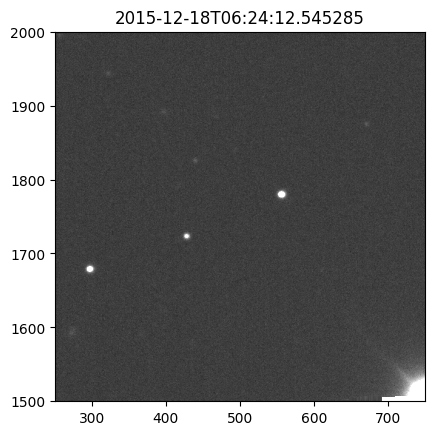

8992d6a3c15f3549efda17170c3b6c14_c4d_151218_062609_ooi_g_v1.fits.fz


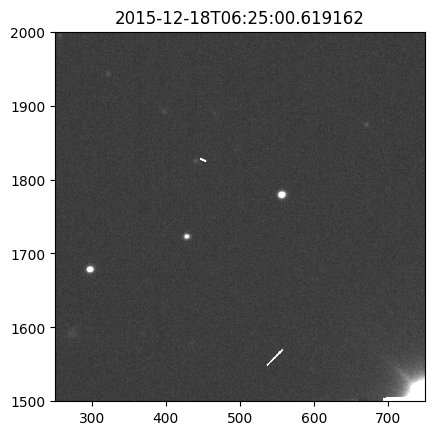

9607e49b49be0827a15b4172ca605b7b_c4d_151218_062657_ooi_g_v1.fits.fz


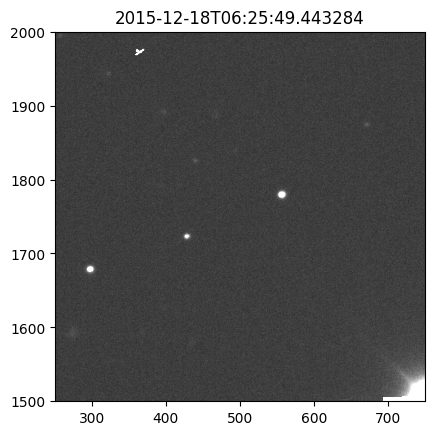

dbd3d1aac2274006f6751d38d92e340c_c4d_151218_062749_ooi_g_v1.fits.fz


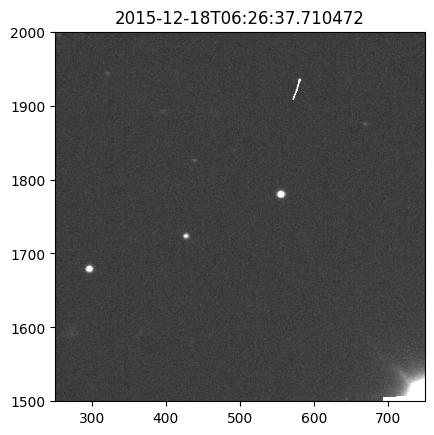

e0bf5d422d13701c27eae44968bb651f_c4d_151218_062835_ooi_g_v1.fits.fz


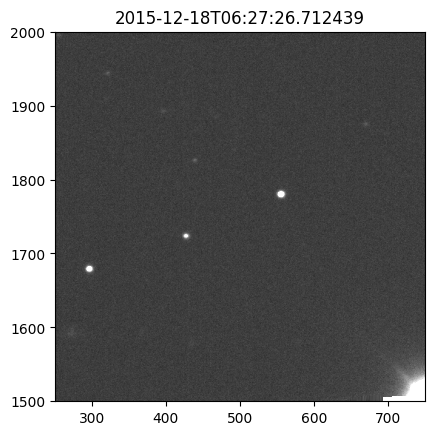

In [74]:
for imname in imnames_timeordered[30:60]:

    image_data = fits.getdata('dwfflare/' + imname, ext=16)
    image_header = fits.getheader('dwfflare/' + imname, ext=0)

    plt.imshow(np.rot90(image_data), cmap='gray', clim=(0,100))
    plt.title(image_header['DATE-OBS'])
    print(imname)
    plt.gca().invert_yaxis()
    #plt.gca().invert_xaxis()
    plt.xlim(250,750)
    plt.ylim(1500,2000)
    plt.show()

In [18]:
fitsname = imnames_timeordered[40]

file = '/Users/riley/Desktop/RAFTS/dwfflare/' + fitsname
os.chdir('srcext')
print('Making SExtractor catalog of '+file+'...')
#print(os.path.isfile(file))
#print(os.getcwd())

os.system('sex ' + file + ' -c default.sex')

cata_df = pd.read_table('out.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD',
'ELLIPTICITY',
'EXT_NUMBER'], index_col=0, comment='#', delim_whitespace=True)

os.chdir('..')

cata_df

Making SExtractor catalog of /Users/riley/Desktop/RAFTS/dwfflare/f4facbcacb39955e95a1e203476c0827_c4d_151218_061322_ooi_g_v1.fits.fz...


> 
----- SExtractor 2.28.0 started on 2023-08-22 at 18:04:59 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for f4facbcacb39955e95a1e203476c0827_c4d_151218_061322_ooi_g_v1.fits.fz
----- Measuring from: f4facbcacb39955e95a1e203476c0827_c4d_151218_061322_ooi_g_v1.fits.fz [1/60]
      "Unnamed" / no ext. header / 2046x4094 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting 

X_IMAGE    Y_IMAGE  XWIN_IMAGE  YWIN_IMAGE  XMODEL_IMAGE  \
NUMBER                                                               
1        551.2563    39.2894    551.5223     39.2053      551.3976   
2        787.3063    78.0661    787.2491     78.0057      787.2698   
3        897.1811   115.1784    897.0993    115.0418      897.1508   
4        631.0338   234.7102    630.9430    234.5479      631.0337   
5        153.4029   258.3144    153.3636    258.1924      153.3913   
...           ...        ...         ...         ...           ...   
69       391.6268  3606.3494    391.5682   3606.2103      391.5972   
70      1835.9874  3716.3030   1835.9591   3716.3340     1835.9649   
71      1068.0679  3506.8674   1068.0536   3506.9396     1068.0755   
72      1231.9354  3727.5161   1232.1816   3727.8870     1230.4343   
73      1508.3394  3605.6880   1508.3827   3605.5927     1508.3983   

        YMODEL_IMAGE   FLUX_AUTO  FLUX_MODEL  MAG_AUTO  MAG_MODEL  \
NUMBER                                                              
1            39.5203    7339.224    1739.406   -9.6641    -8.1010   
2            78.0559   18674.400   18862.340  -10.6781   -10.6890   
3           115.1501  133367.500  134995.000  -12.8126   -12.8258   
4           234.7605  782354.400  787029.100  -14.7335   -14.7400   
5           258.2767   28780.190   29051.810  -11.1477   -11.1579   
...              ...         ...         ...       ...        ...   
69         3606.3135   36889.840   37315.660  -11.4173   -11.4297   
70         3716.3751    5681.889    5790.831   -9.3862    -9.4069   
71         3507.0009    8032.566    8117.159   -9.7621    -9.7735   
72         3725.3611    6115.923    2329.678   -9.4662    -8.4182   
73         3605.7173  772983.900  774225.100  -14.7204   -14.7222   

        FLUX_RADIUS  FLAGS  NITER_MODEL  ALPHA_SKY  DELTA_SKY  THETA_WORLD  \
NUMBER                                                                       
1             1.189      2           56  44.213079 -54.475898        74.21   
2             3.297      0           36  44.217608 -54.493143       -21.83   
3             3.359      0           59  44.222113 -54.501182       -26.05   
4             3.416      0           65  44.237527 -54.481859       -24.43   
5             3.342      0           43  44.241166 -54.447035       -16.57   
...             ...    ...          ...        ...        ...          ...   
69            3.318      0           64  44.661632 -54.466095       -19.04   
70            3.234      0           47  44.674547 -54.571339        -1.65   
71            3.359      0           40  44.648670 -54.515349       -38.12   
72            2.354      0           77  44.676344 -54.527348       -34.30   
73            3.650      0           51  44.660820 -54.547446       -33.43   

        ELLIPTICITY  EXT_NUMBER  
NUMBER                           
1             0.477           1  
2             0.106           1  
3             0.074           1  
4             0.067           1  
5             0.082           1  
...             ...         ...  
69            0.059           1  
70            0.147           1  
71            0.081           1  
72            0.725           1  
73            0.129           1  

[73 rows x 18 columns]

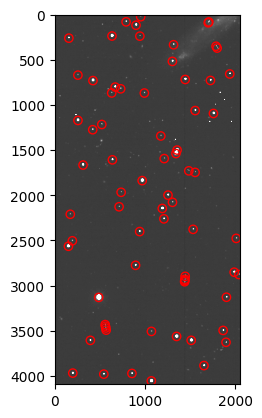

In [13]:
image_data = fits.getdata('/Users/riley/Desktop/RAFTS/dwfflare/0a7936112f3150350b27277900f88de2_c4d_151218_061807_ooi_g_v1.fits.fz', ext=1)
plt.imshow(image_data, cmap='gray', clim=(0,100))
plt.scatter(cata_df['X_IMAGE'], cata_df['Y_IMAGE'], marker='o', facecolor='none', edgecolor='red')

In [23]:
def makefitsfromext(file, ext, outdir):
    hdu_list = fits.open(file)
    data = hdu_list[ext].data
    header = hdu_list[0].header

    hdr = fits.Header()
    hdr['DATE-OBS'] = header['DATE-OBS']
    empty_primary = fits.PrimaryHDU(header=hdr)

    image_hdu = fits.ImageHDU(data)

    hdul = fits.HDUList([empty_primary, image_hdu])

    hdul.writeto(outdir)

In [46]:
for name in imnames_timeordered:

    makefitsfromext('dwfflare/' + name, ext=16, outdir='dwfflare/dwfflareS18/'+ name[:-8] + '_S18.fits.fz')

Making SExtractor catalog of /Users/riley/Desktop/RAFTS/dwfflare/dwfflareS18/9719d5936f044286414621fffbf331a8_c4d_151218_061057_ooi_g_v1_S18.fits.fz...


> 
----- SExtractor 2.28.0 started on 2023-08-29 at 15:10:21 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for 9719d5936f044286414621fffbf331a8_c4d_151218_061057_ooi_g_v1_S18.fits.fz
----- Measuring from: 9719d5936f044286414621fffbf331a8_c4d_151218_061057_ooi_g_v1_S18.fits.fz [1/1]
      "Unnamed" / no ext. header / 2046x4094 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> S

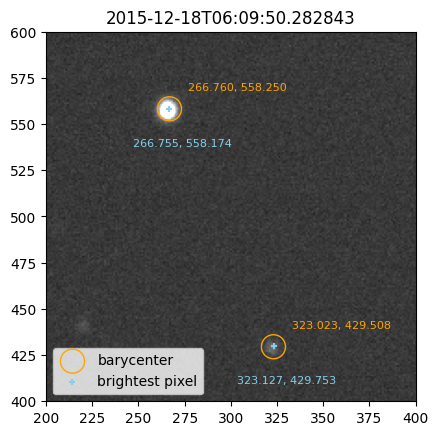

In [128]:
name = '9719d5936f044286414621fffbf331a8_c4d_151218_061057_ooi_g_v1_S18.fits.fz'

file = '/Users/riley/Desktop/RAFTS/dwfflare/dwfflareS18/' + name
os.chdir('srcext')
print('Making SExtractor catalog of '+file+'...')
#print(os.path.isfile(file))
#print(os.getcwd())

os.system('sex ' + file + ' -c default.sex -DETECT_MINAREA 20 -DETECT_THRESH 5 -ANALYSIS_THRESH 5')

cata_df = pd.read_table('out.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XPEAK_IMAGE',
'YPEAK_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD',
'ELLIPTICITY',
'EXT_NUMBER'], index_col=0, comment='#', delim_whitespace=True)

os.chdir('..')

image_data = fits.getdata('dwfflare/dwfflareS18/' + name)
image_header = fits.getheader('dwfflare/dwfflareS18/' + name)
plt.imshow(image_data, cmap='gray', clim=(0,100))
plt.scatter(cata_df['X_IMAGE'], cata_df['Y_IMAGE'], marker='o', s=300, facecolor='none', edgecolor='orange', label='barycenter')
plt.scatter(cata_df['XPEAK_IMAGE'], cata_df['YPEAK_IMAGE'], marker='+', s=20, color='skyblue', label='brightest pixel')
plt.title(image_header['DATE-OBS'])
for i in range(len(cata_df)):
    plt.annotate('{0:.3f}, {1:.3f}'.format(cata_df['X_IMAGE'].values[i], cata_df['Y_IMAGE'].values[i]), 
                 xy=(cata_df['X_IMAGE'].values[i], cata_df['Y_IMAGE'].values[i]), 
                 xytext=(cata_df['X_IMAGE'].values[i] + 10, cata_df['Y_IMAGE'].values[i] + 10), fontsize=8, color='orange')
    
    plt.annotate('{0:.3f}, {1:.3f}'.format(cata_df['XPEAK_IMAGE'].values[i], cata_df['YPEAK_IMAGE'].values[i]), 
                xy=(cata_df['XPEAK_IMAGE'].values[i], cata_df['YPEAK_IMAGE'].values[i]), 
                xytext=(cata_df['XPEAK_IMAGE'].values[i]-20, cata_df['YPEAK_IMAGE'].values[i]-20), fontsize=8, color='skyblue')
plt.xlim(200,400)
plt.ylim(400,600)
plt.legend(loc='lower left')

Making SExtractor catalog of /Users/riley/Desktop/RAFTS/dwfflare/dwfflareS18/489f990fd94eb9cff4b14219e98b6bde_c4d_151218_061146_ooi_g_v1_S18.fits.fz...


> 
----- SExtractor 2.28.0 started on 2023-08-29 at 15:14:40 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for 489f990fd94eb9cff4b14219e98b6bde_c4d_151218_061146_ooi_g_v1_S18.fits.fz
----- Measuring from: 489f990fd94eb9cff4b14219e98b6bde_c4d_151218_061146_ooi_g_v1_S18.fits.fz [1/1]
      "Unnamed" / no ext. header / 2046x4094 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> S

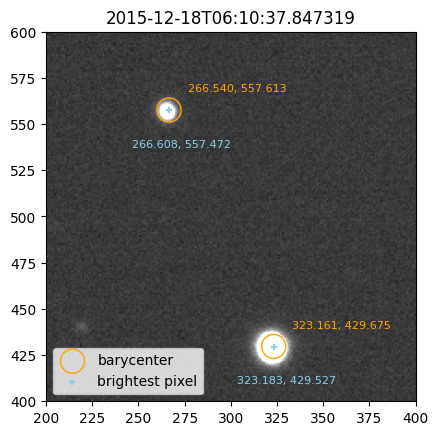

In [129]:
name = '489f990fd94eb9cff4b14219e98b6bde_c4d_151218_061146_ooi_g_v1_S18.fits.fz'

file = '/Users/riley/Desktop/RAFTS/dwfflare/dwfflareS18/' + name
os.chdir('srcext')
print('Making SExtractor catalog of '+file+'...')
#print(os.path.isfile(file))
#print(os.getcwd())

os.system('sex ' + file + ' -c default.sex -DETECT_MINAREA 20 -DETECT_THRESH 5 -ANALYSIS_THRESH 5')

cata_df = pd.read_table('out.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XPEAK_IMAGE',
'YPEAK_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD',
'ELLIPTICITY',
'EXT_NUMBER'], index_col=0, comment='#', delim_whitespace=True)

os.chdir('..')

image_data = fits.getdata('dwfflare/dwfflareS18/' + name)
image_header = fits.getheader('dwfflare/dwfflareS18/' + name)
plt.imshow(image_data, cmap='gray', clim=(0,100))
plt.scatter(cata_df['X_IMAGE'], cata_df['Y_IMAGE'], marker='o', s=300, facecolor='none', edgecolor='orange', label='barycenter')
plt.scatter(cata_df['XPEAK_IMAGE'], cata_df['YPEAK_IMAGE'], marker='+', s=20, color='skyblue', label='brightest pixel')
for i in range(len(cata_df)):
    plt.annotate('{0:.3f}, {1:.3f}'.format(cata_df['X_IMAGE'].values[i], cata_df['Y_IMAGE'].values[i]), 
                 xy=(cata_df['X_IMAGE'].values[i], cata_df['Y_IMAGE'].values[i]), 
                 xytext=(cata_df['X_IMAGE'].values[i] + 10, cata_df['Y_IMAGE'].values[i] + 10), fontsize=8, color='orange')
    
    plt.annotate('{0:.3f}, {1:.3f}'.format(cata_df['XPEAK_IMAGE'].values[i], cata_df['YPEAK_IMAGE'].values[i]), 
                xy=(cata_df['XPEAK_IMAGE'].values[i], cata_df['YPEAK_IMAGE'].values[i]), 
                xytext=(cata_df['XPEAK_IMAGE'].values[i]-20, cata_df['YPEAK_IMAGE'].values[i]-20), fontsize=8, color='skyblue')
    
plt.title(image_header['DATE-OBS'])
plt.xlim(200,400)
plt.ylim(400,600)
plt.legend(loc='lower left')